# Лабораторная работа №5.  Цифровой спектральный анализ.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [2]:
%matplotlib inline

In [3]:
# %matplotlib notebook

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга |
| $w_3[k]$ | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ). 
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного. 

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа? 


In [3]:
N = 64

In [4]:
def plot_window(w):
    plt.figure(figsize=[8, 10], dpi=120)
    plt.subplot(3, 1, 1)
    k=np.arange(N)
    plt.stem(k, w)
    plt.xlabel('$k$')
    plt.ylabel('$w[k]$')
    nu, Wn = DTFT(w, M=16*2048)
    plt.subplot(3, 1, 2)
    k=np.arange(N)
    plt.plot(nu, abs(Wn))
    plt.xlabel('$\\nu$')
    plt.ylabel('$|W(\\nu)|$')
    plt.grid()
    plt.subplot(3, 1, 3)
    k=np.arange(N)
    with np.errstate(divide='ignore'):
        plt.plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-100)
    plt.xlim([-0.2, 0.2])
    plt.grid()
    plt.xlabel('$\\nu$')
    plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
    plt.tight_layout()

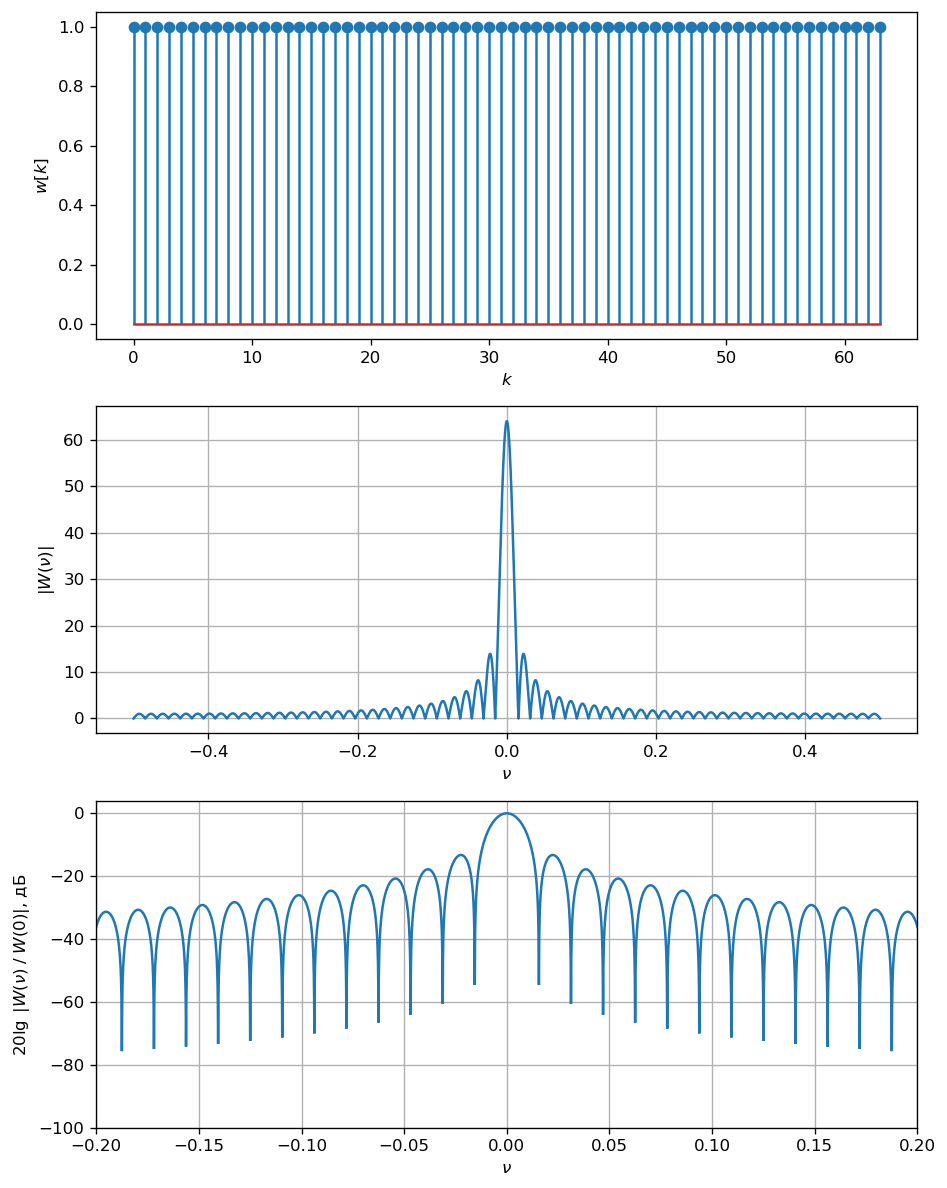

In [5]:
w1=signal.windows.boxcar(M=N, sym=False)
plot_window(w1)
# 0.031
# 0.014
# 0.018
# -13.25

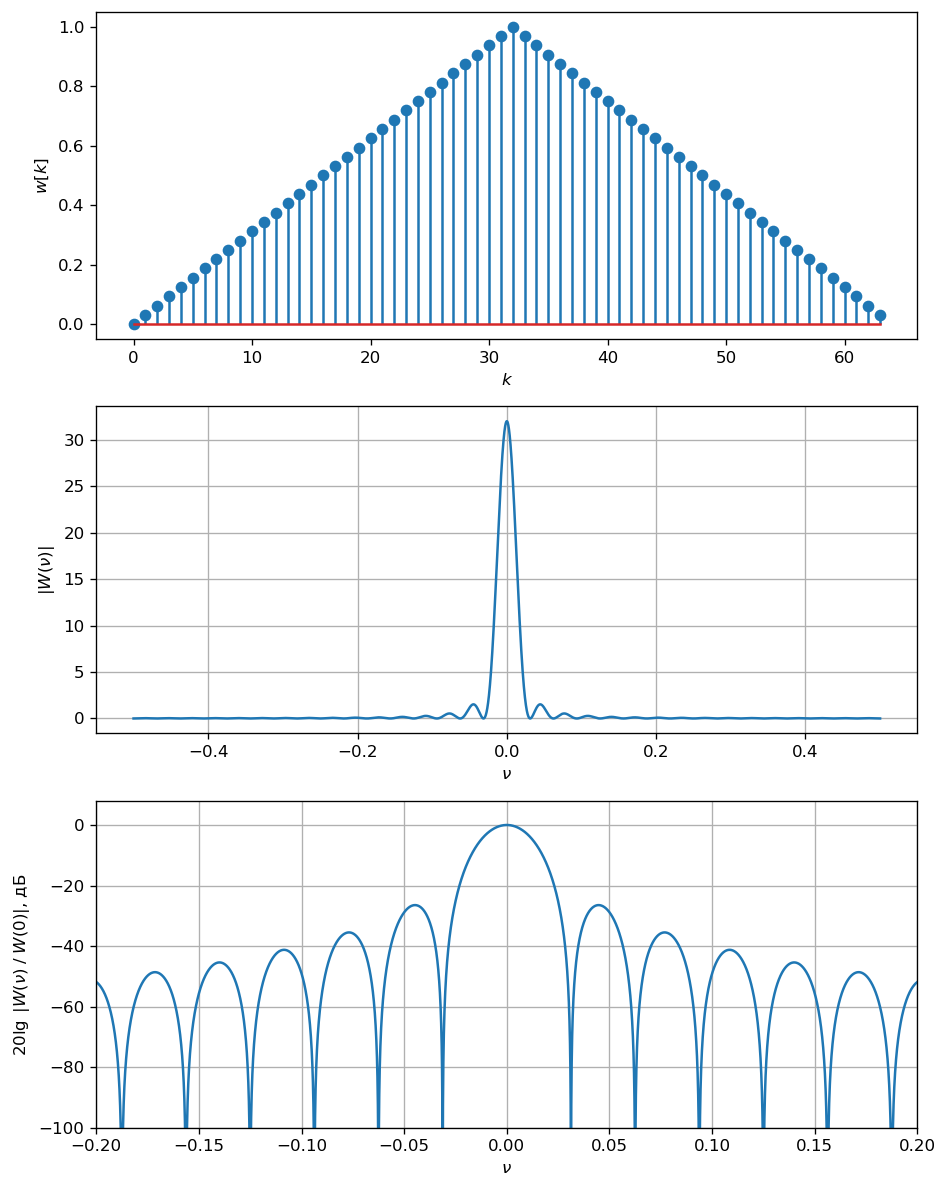

In [6]:
w2=signal.windows.bartlett(M=N, sym=False)
plot_window(w2)
# 0.0628
# 0.02
# 0.0275
# -26.5

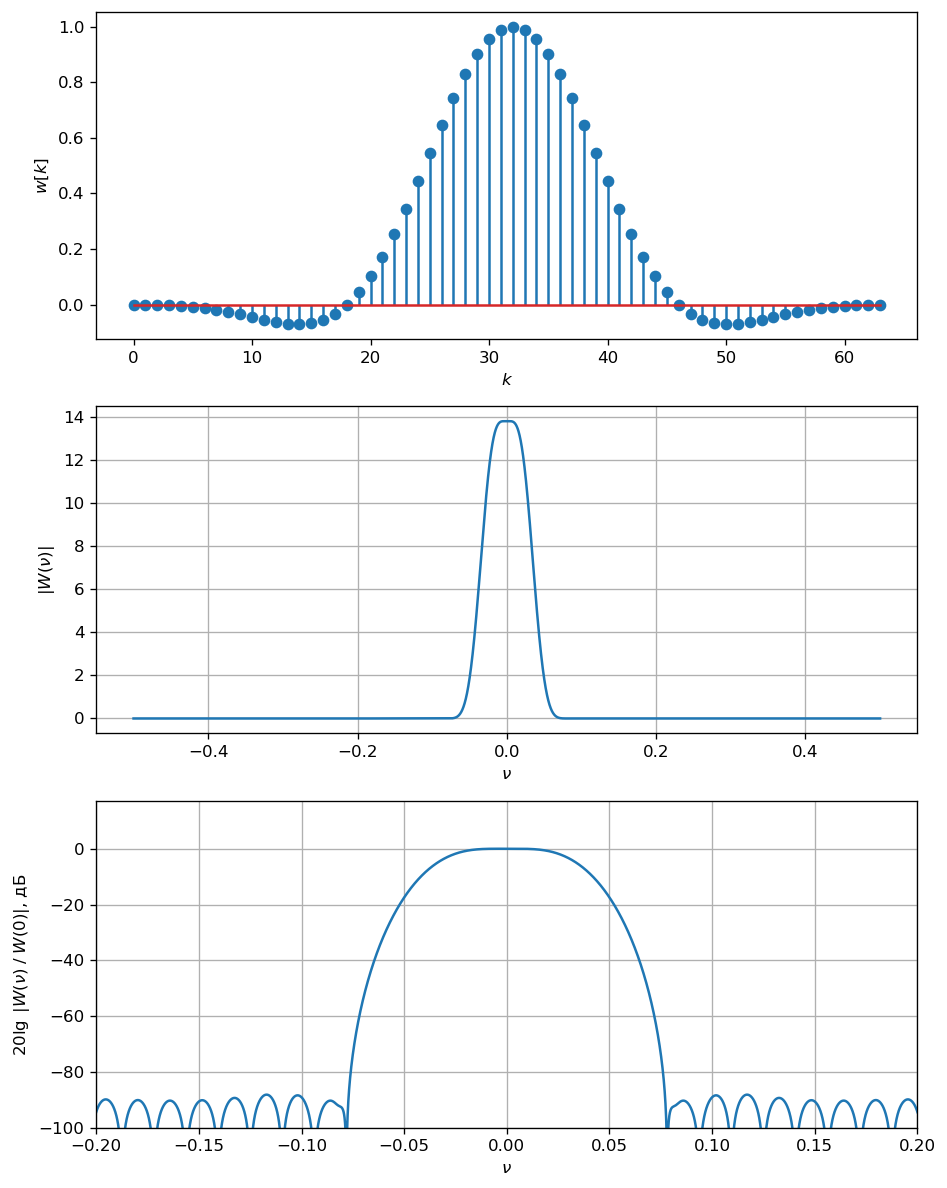

In [7]:
w3=signal.windows.flattop(M=N, sym=False)
plot_window(w3)
# 0.158
# 0.057
# 0.072
# -88.16

In [8]:
N = 64
n0 = 20
M = 2048
k = np.arange(N)
x = np.cos(2*np.pi*n0*k/N)+np.cos(2*np.pi*(n0+2)*k/N)

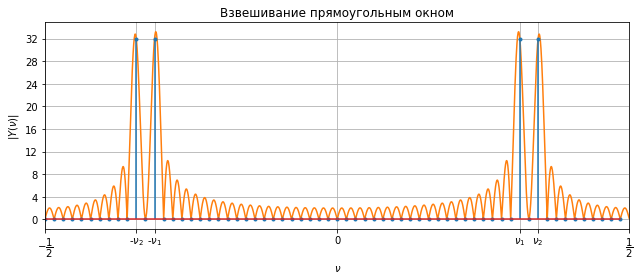

In [9]:
y1=x*w1
nu, Xn = DTFT(y1, M=M)
Nz=0
plt.figure(figsize=[9, 4])
plt.title('Взвешивание прямоугольным окном')
plt.plot(nu, abs(Xn), 'C1')

nu, Xn = DTFT(y1, M=64+Nz)
plt.stem(nu, abs(Xn), linefmt='C0-', markerfmt='C0.')
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -(n0+2)/N, -n0/N, 0, n0/N, (n0+2)/N, 0.5], labels=("$-\dfrac{1}{2}$", "-$\\nu_2$", "-$\\nu_1$", 
                                                                 "0", "$\\nu_1$", "$\\nu_2$", "$\dfrac{1}{2}$"))
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=4))
plt.grid()
plt.tight_layout()

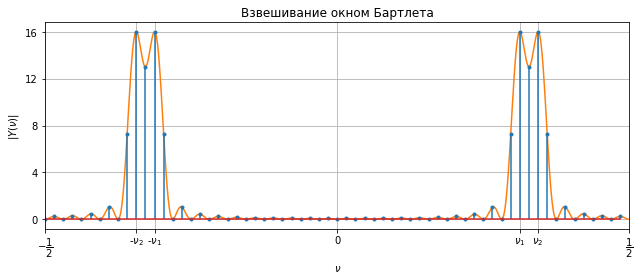

In [10]:
Nz=0
y2=x*w2
nu, Xn = DTFT(y2, M=M)

plt.figure(figsize=[9, 4])
plt.title('Взвешивание окном Бартлета')
plt.plot(nu, abs(Xn), 'C1')

nu, Xn = DTFT(y2, M=64+Nz)
#nu, Xn = DFT(y, M=64)
plt.stem(nu, abs(Xn), linefmt='C0-', markerfmt='C0.')
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -(n0+2)/N, -n0/N, 0, n0/N, (n0+2)/N, 0.5], labels=("$-\dfrac{1}{2}$", "-$\\nu_2$", "-$\\nu_1$", 
                                                                 "0", "$\\nu_1$", "$\\nu_2$", "$\dfrac{1}{2}$"))
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=4))
plt.grid()
plt.tight_layout()

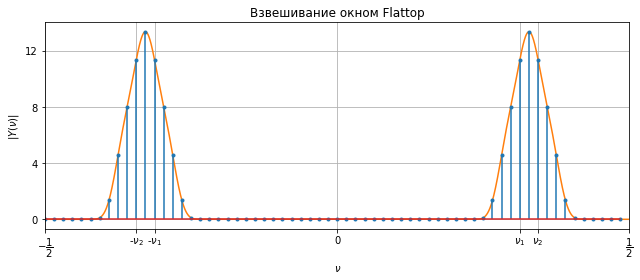

In [11]:
Nz=0
y3=x*w3
nu, Xn = DTFT(y3, M=M)

plt.figure(figsize=[9, 4])
plt.title('Взвешивание окном Flattop')
plt.plot(nu, abs(Xn), 'C1')

nu, Xn = DTFT(y3, M=64+Nz)
#nu, Xn = DFT(y, M=64)
plt.stem(nu, abs(Xn), linefmt='C0-', markerfmt='C0.')
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -(n0+2)/N, -n0/N, 0, n0/N, (n0+2)/N, 0.5], labels=("$-\dfrac{1}{2}$", "-$\\nu_2$", "-$\\nu_1$", 
                                                                 "0", "$\\nu_1$", "$\\nu_2$", "$\dfrac{1}{2}$"))
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=4))
plt.grid()
plt.tight_layout()

## Задача 1.2. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |

1) Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи). 

2) Вычислить 2048-точечное ДПФ для $x[k]$, используя 
* а) матричную форму ДПФ, 
* б) быстрое преобразование Фурье. 

Сравнить результаты. 

3) Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$. 

---

**Алгоритм Герцеля**

1. Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2. Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



In [12]:
import scipy.io.wavfile
from IPython.display import Audio

afopen = './dataset_lab5/major-scale-piano.wav'
fs, x=scipy.io.wavfile.read(afopen)
N = 2048
print(x.shape)
print(fs)
xf = np.zeros(N)
x1 = x[:, 0]
X=scipy.fft.fftshift(scipy.fft.fft(x1))
nu=-0.5+np.linspace(0, 1, num=x1.size, endpoint=False)
Audio(afopen)

(416879, 2)
44100


In [13]:
for i in range(N):
    xf[i] = x1[(int(x.shape[0]*4/9)) - 1024 + i]

print(xf.shape)

(2048,)


In [14]:
Xn1 = np.fft.fft(xf, N)

In [15]:
from scipy.linalg import dft
W = dft(N)
Xn2 = W @ xf

In [16]:
max(abs(Xn1-Xn2))

3.2570138144409497e-07

In [17]:
n1=18
n2 = 159
n3 = 1298

def w(n, k=1, N=2):
    return np.exp(-2j*np.pi*n*k/N)


beta1=np.array([w(n=-n1, k=1, N=N), -1.0], dtype=complex)
alpha1=np.array([1.0, -2.0*np.cos(2*np.pi*n1/N), 1.0], dtype=complex)

beta2=np.array([w(n=-n2, k=1, N=N), -1.0], dtype=complex)
alpha2=np.array([1.0, -2.0*np.cos(2*np.pi*n2/N), 1.0], dtype=complex)

beta3=np.array([w(n=-n3, k=1, N=N), -1.0], dtype=complex)
alpha3=np.array([1.0, -2.0*np.cos(2*np.pi*n3/N), 1.0], dtype=complex)


y1 = signal.lfilter(beta1, alpha1, xf)
y2 = signal.lfilter(beta2, alpha2, xf)
y3 = signal.lfilter(beta3, alpha3, xf)

In [18]:
print(f'БПФ             {Xn1[n1]}')
print(f'Матричная форма {Xn2[n1]}')
print(f'Герцель         {y1[N-1]}')
print(f'БПФ             {Xn1[n2]}')
print(f'Матричная форма {Xn2[n2]}')
print(f'Герцель         {y2[N-1]}')
print(f'БПФ             {Xn1[n3]}')
print(f'Матричная форма {Xn2[n3]}')
print(f'Герцель         {y3[N-1]}')

БПФ             (-142839.22934363584-45790.01755073j)
Матричная форма (-142839.22934364207-45790.01755072801j)
Герцель         (-142839.22934373707-45790.01755068179j)
БПФ             (-32.741097131409106-252.7964025411062j)
Матричная форма (-32.74109713181588-252.79640254056142j)
Герцель         (-32.74109713118037-252.79640254110723j)
БПФ             (-498.9197616771785-153.91240046964322j)
Матричная форма (-498.91976167602144-153.91240047131043j)
Герцель         (-498.9197616771512-153.9124004696862j)


# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










In [19]:
from matplotlib import gridspec
afopen = './dataset_lab5/major-scale-piano.wav'
fs, x1=scipy.io.wavfile.read(afopen)
x = x1[:, 0]
print(x.shape)
print(fs)

(416879,)
44100


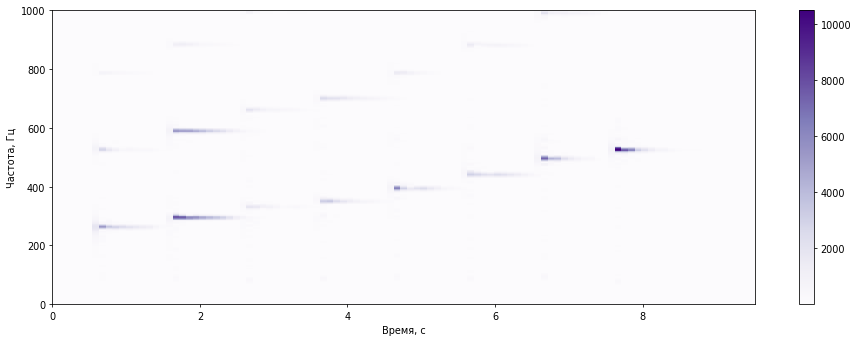

In [20]:
# window - okno
# nperseg - M
# noverlap - L
# nfft - Nfft
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=8000, noverlap=4000, nfft=2**14)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.ylim((0, 1000))
plt.tight_layout()

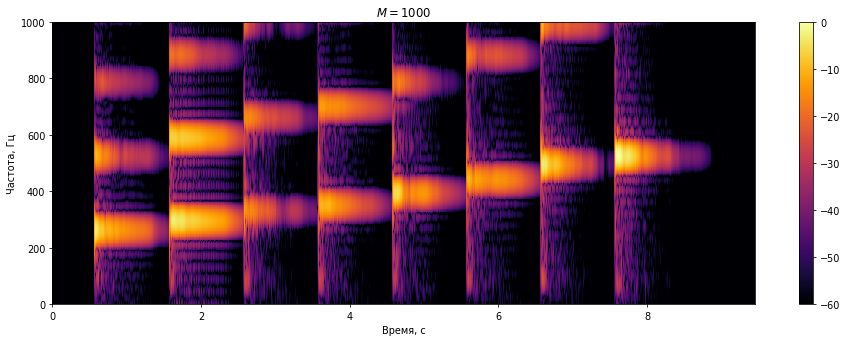

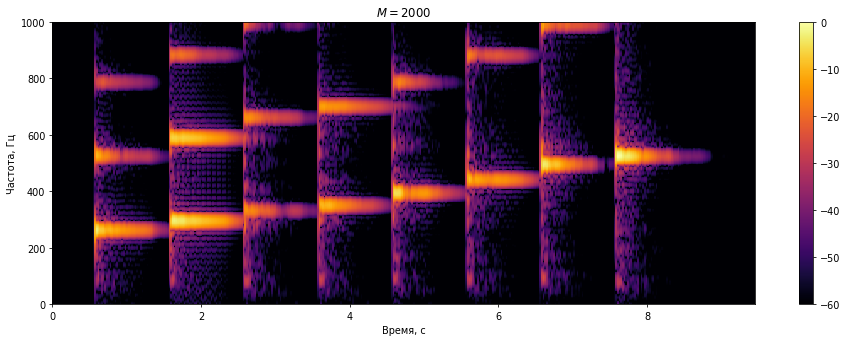

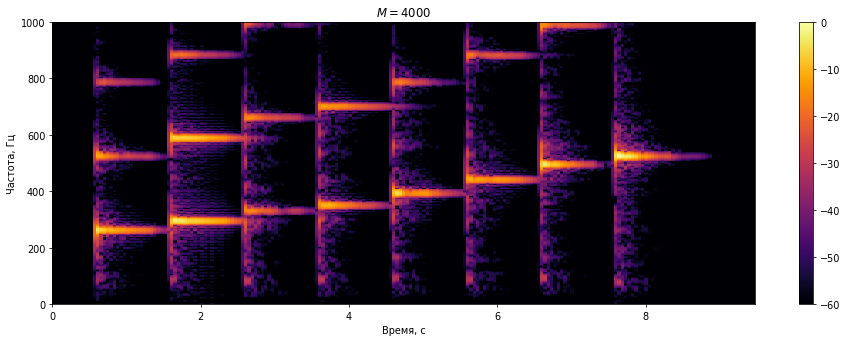

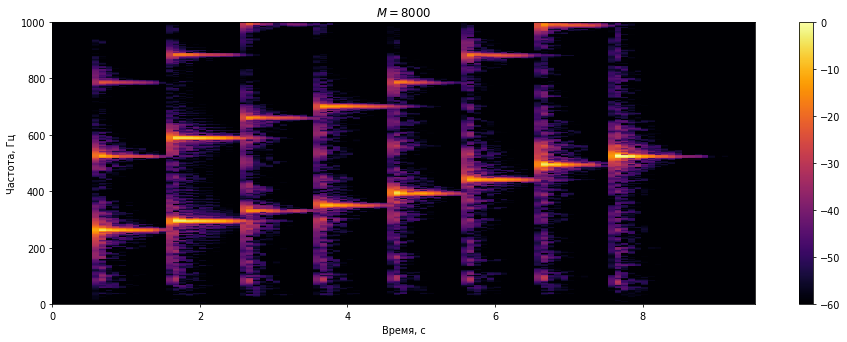

In [21]:
for nperseg in [1000, 2000, 4000, 8000]:
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=max(2**14, nperseg))
    plt.figure(figsize=[13.5, 5], num='R = %i' % (nperseg-noverlap), dpi=70)
    plt.title('$M = $%i' % nperseg)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 1000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

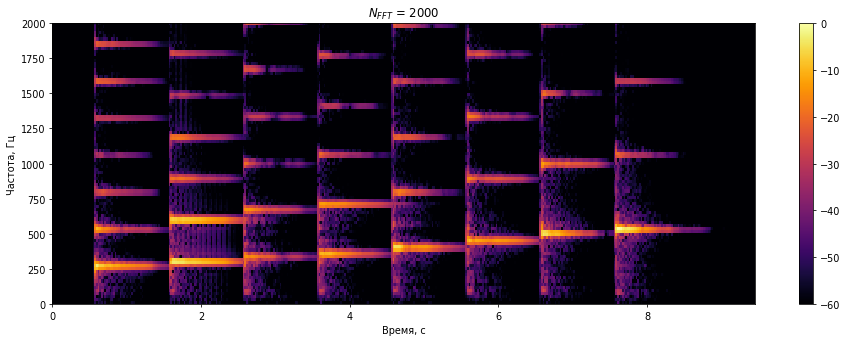

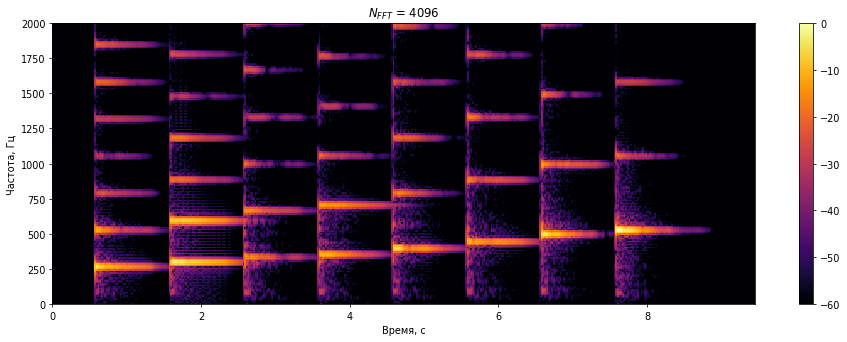

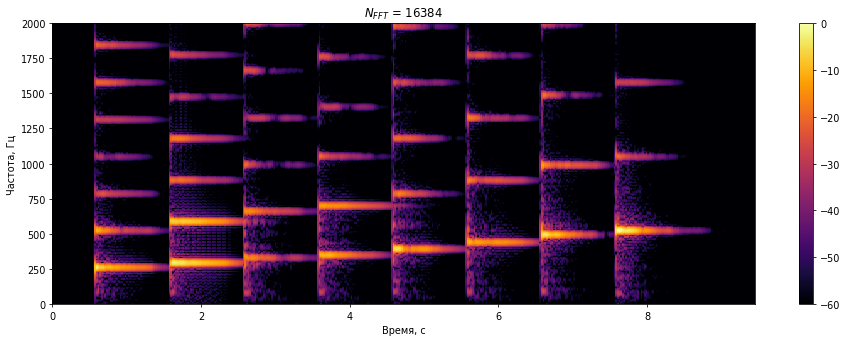

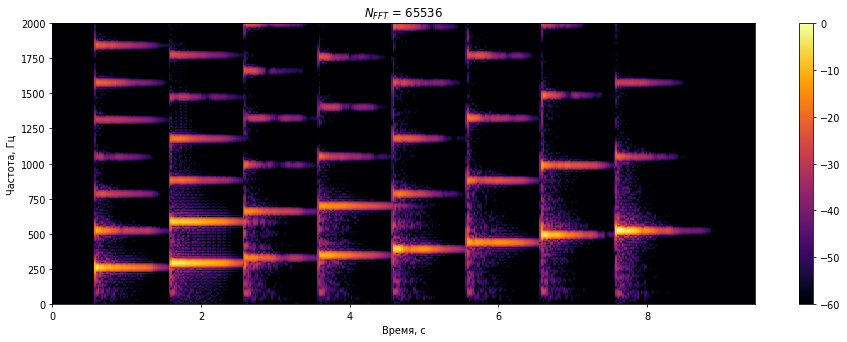

In [22]:
for nfft in [2000, 2**12, 2**14, 2**16]:
    nperseg=2000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=('kaiser', 4), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    plt.figure(figsize=[13.5, 5], num='nfft = %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 2000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

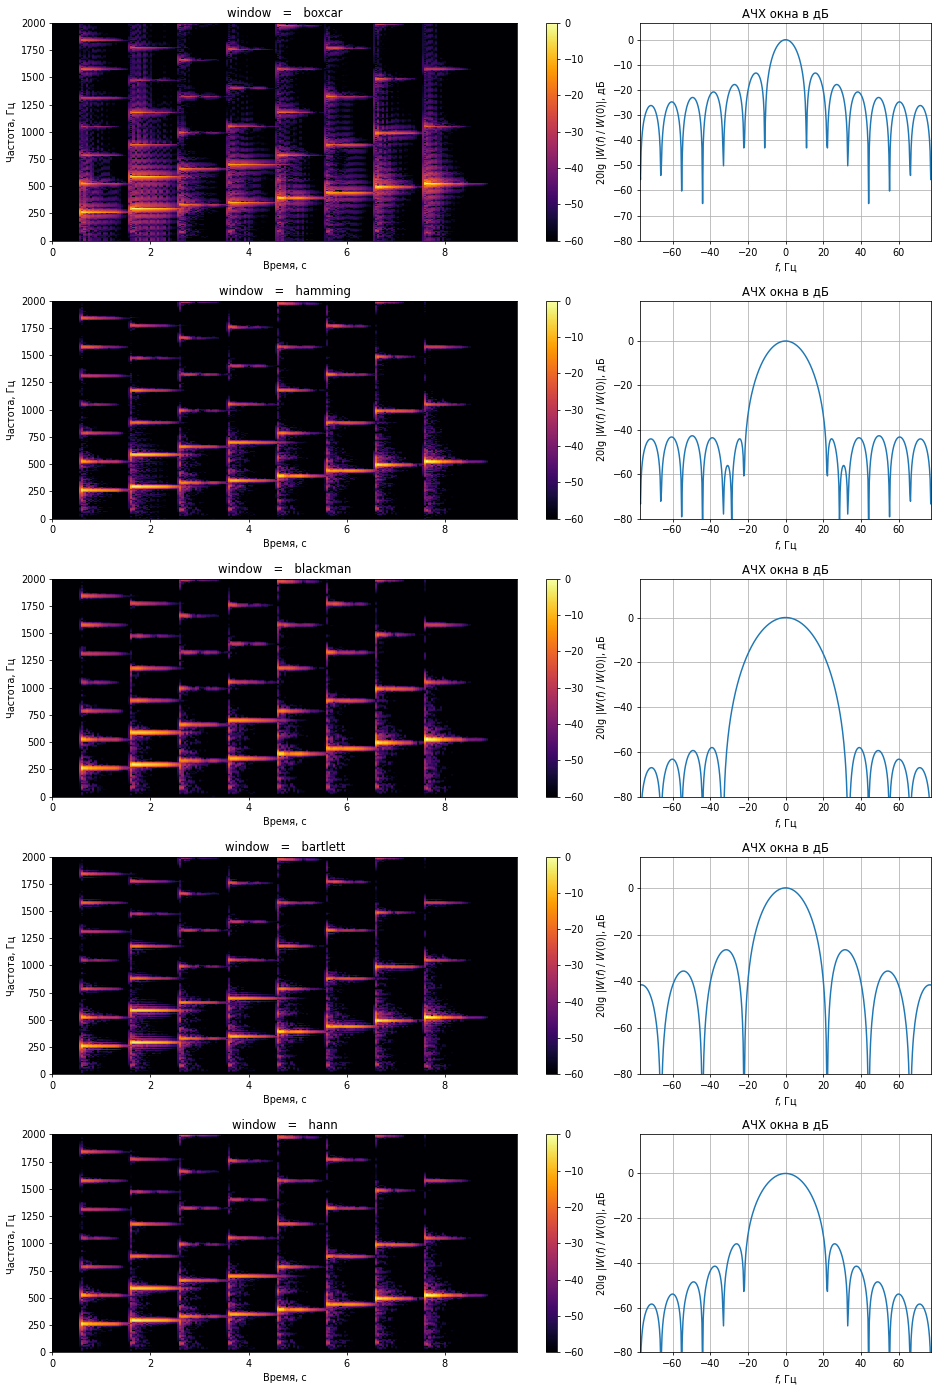

In [23]:
windows=['boxcar', 'hamming', 'blackman', 'bartlett', 'hann']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 20], dpi=70)
for window in windows: 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    
    nperseg=4000
#     noverlap=nperseg*2//3
    noverlap=nperseg//2


    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    with np.errstate(divide='ignore'):
        plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(np.abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 2000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    with np.errstate(divide='ignore'):
        plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1
    

#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy|

По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае? 

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`). 

In [24]:
x = np.load('./dataset_lab5/variant_1_ex_2_1.npy')
fs = 16000
N = x.shape[0]
print(x.shape)
print(N)

(64,)
64


250.0


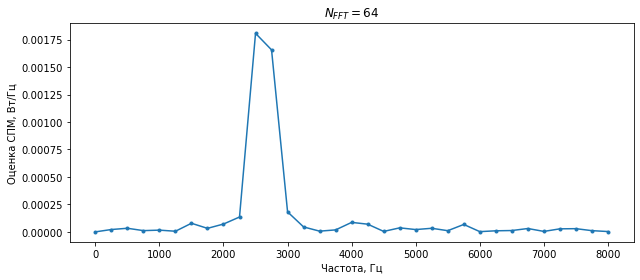

In [25]:
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.figure(figsize=[9, 4])
plt.plot(f, Pxx_den/2, '.-')
plt.title("$N_{FFT} = %i$" %N)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
print(fs/N)

31.25


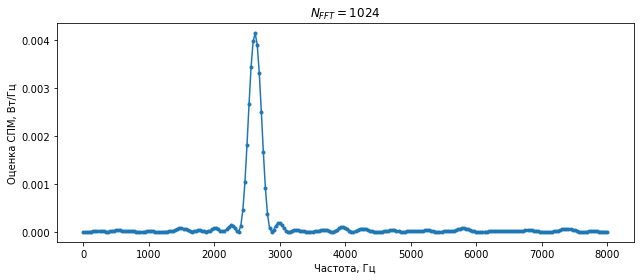

In [26]:
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=N*8, scaling='density')
plt.figure(figsize=[9, 4])
plt.plot(f, Pxx_den/2, '.-')
plt.title("$N_{FFT} = %i$" %2**10)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
print(fs/(8*N))

## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

A^2 N / 4 =  400.0
sigma^2 =  400


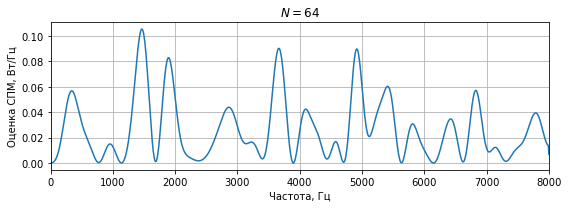

In [27]:
fs=16000
f0=2000
a1=5
N=64
k=np.arange(N)
x=a1*np.sin(2*np.pi*k*f0/fs)+np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", (a1**2)*N/4)
print("sigma^2 = ", 400)

f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', nfft=2**11, scaling='density')
plt.figure(figsize=[8, 3])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.xlim([0, fs/2])
plt.tight_layout()
plt.show()

A^2 N / 4 =  51200.0
sigma^2 =  400


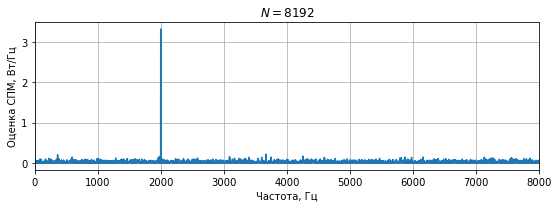

In [28]:
fs=16000
f0=2000
a1=5
N=2**13
k=np.arange(N)
x=a1*np.sin(2*np.pi*k*f0/fs)+np.random.normal(scale=20, size=N)

print("A^2 N / 4 = ", (a1**2)*N/4)
print("sigma^2 = ", 400)

f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', scaling='density')

plt.figure(figsize=[8, 3])
plt.title("$N = %i$" %len(x))
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.xlim([0, fs/2])
plt.tight_layout()
plt.show()

#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy|

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты. 

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид 
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


In [29]:
x = np.load('./dataset_lab5/variant_1_ex_3_1.npy')
print(x.shape)

(4096,)


In [30]:
fs = 16000
N = x.size
nperseg = N//4

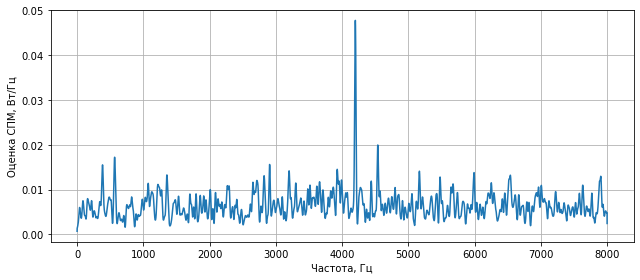

In [31]:
f, Pxx_den =  signal.welch(x,  fs=fs, window='hann', nperseg=nperseg, noverlap=(nperseg//2), nfft=2**18, return_onesided=True, scaling='density')
plt.figure(figsize=[9, 4])
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

In [32]:
maxind = (Pxx_den/2).argmax()
print(f[maxind])

4200.01220703125


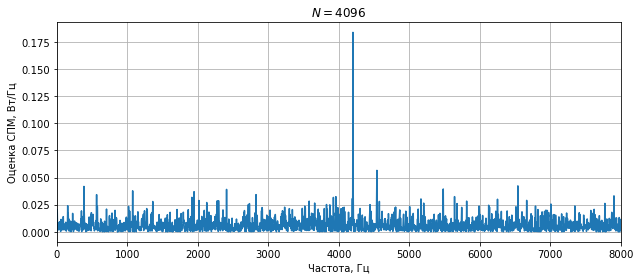

In [33]:
f, Pxx_den = signal.periodogram(x, fs=fs, window='boxcar', scaling='density')

plt.figure(figsize=[9, 4])
plt.title("$N = %i$" %len(x))
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.xlim([0, fs/2])
plt.tight_layout()
plt.show()

In [34]:
maxind = (Pxx_den/2).argmax()
print(f[maxind])

4199.21875


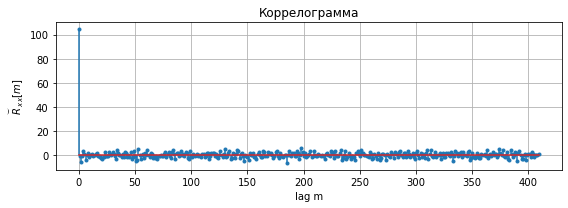

In [35]:
N1 = int(np.ceil(N/10))

def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / len(x)
    lag = np.arange(-(len(x)-1), len(x))
    return Rx[np.logical_and(lag<=N1-1, lag>=0)]

def  blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

Rx = auto_correlation(x, N1, mode='biased')
plt.figure(figsize=[8, 3])
plt.tight_layout()
plt.stem(np.arange(len(Rx)), Rx, linefmt='', markerfmt='.')
plt.title("Коррелограмма")
plt.xlabel('lag m')
plt.ylabel('${{\\overset{\\smile}{R}}_{x}}_x[m]$')
plt.grid()
plt.tight_layout()
plt.show()

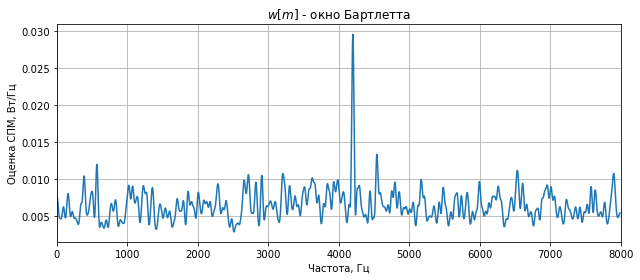

In [36]:
f, P_BT = blackman_tukey_estimator(x, window='bartlett', fs=fs)

plt.figure(figsize=[9, 4])
plt.plot(f, P_BT)
plt.xlim([0, fs/2])
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.title('$w[m]$ - окно Бартлетта')
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
maxind = (P_BT).argmax()
print(f[maxind])

4199.21875


## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 4.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 4.1. 

In [38]:
def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / len(x)
    Rx_u = np.zeros(len(Rx))
    lag = np.arange(-(len(x)-1), len(x))
    for m in lag:
        Rx_u[m] = Rx[m]*len(x)/(len(x) - abs(m))
    if mode == 'biased':
        return Rx[np.logical_and(lag<=N1-1, lag>=0)]
    if mode == 'unbiased':
        return Rx_u[np.logical_and(lag<=N1-1, lag>=0)]
    

def blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

In [39]:
x = np.load('./dataset_lab5/variant_1_ex_3_1.npy')
fs = 16000
N = x.size

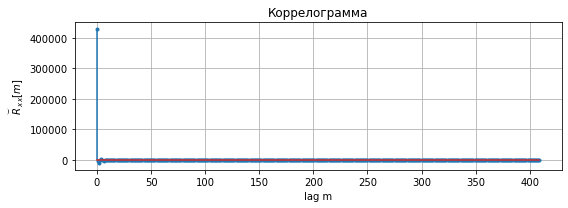

In [40]:
N1 = int(np.ceil(N/10))

Rx = auto_correlation(x, N1, mode='unbiased')
plt.figure(figsize=[8, 3])
plt.tight_layout()
plt.stem(np.arange(len(Rx)), Rx, linefmt='', markerfmt='.')
plt.title("Коррелограмма")
plt.xlabel('lag m')
plt.ylabel('${{\\overset{\\smile}{R}}_{x}}_x[m]$')
plt.grid()
plt.tight_layout()
plt.show()

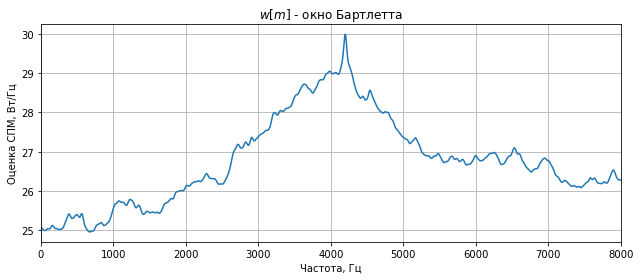

In [47]:
f, P_BT = blackman_tukey_estimator(x, window='bartlett', auto_correlation_mode='unbiased', fs=fs)

plt.figure(figsize=[9, 4])
plt.plot(f, P_BT)
plt.xlim([0, fs/2])
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.title('$w[m]$ - окно Бартлетта')
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
maxind = (P_BT).argmax()
print(f[maxind])

4199.21875


## Задача 4.3*. Оценка кросс-спектральной плотности мощности 

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy|

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы. 

In [49]:
x, y = np.load('./dataset_lab5/variant_1_ex_3_3.npy')
print(x.shape)
print(y.size)
fs=16000
nperseg = x.size//64

(16384,)
16384


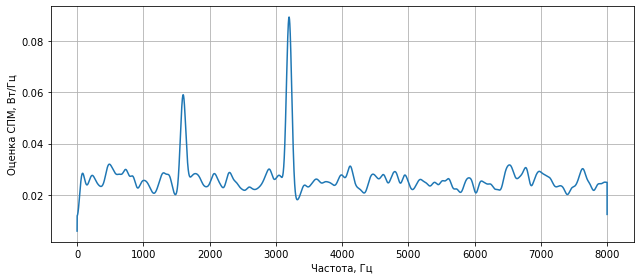

In [50]:
f, Pxx_den =  signal.welch(x,  fs=fs, window='hann', nperseg=nperseg, noverlap=(nperseg//2), nfft=2**18, return_onesided=True, scaling='density')
plt.figure(figsize=[9, 4])
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

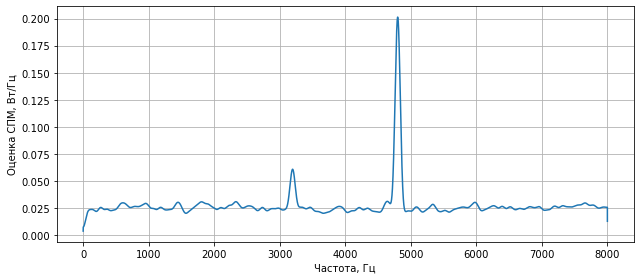

In [51]:
f, Pxx_den =  signal.welch(y,  fs=fs, window='hann', nperseg=nperseg, noverlap=(nperseg//2), nfft=2**18, return_onesided=True, scaling='density')
plt.figure(figsize=[9, 4])
plt.grid()
plt.plot(f, Pxx_den/2, '-')
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()

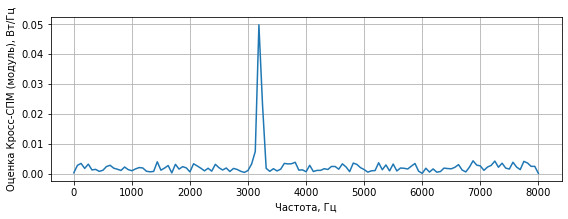

In [52]:
f, Pxy = signal.csd(x, y, fs, nperseg=x.size//64)
plt.figure(figsize=[8, 3])
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка Кросс-СПМ (модуль), Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

In [54]:
maxind = (Pxy).argmax()
print(f[maxind])

3187.5


In [55]:
f, Pxy = signal.csd(x, y, fs, nperseg=x.size//64)
f, Pyx = signal.csd(y, x, fs, nperseg=x.size//64)
dif = (Pxy-np.conjugate(Pyx))
max(abs(dif))

0.0

## Задача 4.4. Периодограмма Ломба-Скаргла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy|

Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`). 

In [56]:
x, t = np.load('./dataset_lab5/variant_1_ex_3_4.npy')
print(x.shape)
print(t.size)
N = x.size
fs = 16000

(531,)
531


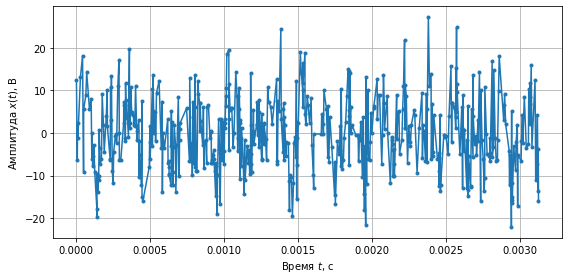

In [57]:
plt.figure(figsize=[8, 4])
plt.plot(t, x, '.-')
plt.xlabel('Время $t$, с')
plt.ylabel('Амплитуда $x(t)$, В')
plt.tight_layout()
plt.grid()
plt.show()

In [58]:
w=np.linspace(fs/2**14, fs/2, 2**12)*2*np.pi
pgram = signal.lombscargle(t, x, w, normalize=True)

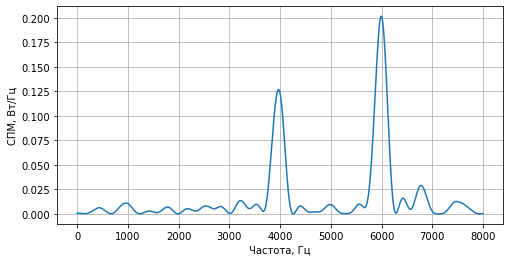

In [59]:
plt.figure(figsize=[8, 4])
plt.plot(w/(2*np.pi), pgram)
plt.xlabel('Частота, Гц')
plt.ylabel('СПМ, Bт/Гц')
plt.grid()
plt.show()